In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Principal Component Analysis

Materia: Aprendizaje Automatico <br>
Docente: Esteban Roitberg <br>
Alumno: Gonzalo Jara

# ¿Que es PCA?

Es una tecnica de reduccion de dimensionalidad. <br>
Nos permite tomar una matriz de datos $X: n \times p$ con un $p$ muy grande y expresarla en un subespacio de "componentes principales" <br>

Por ejemplo: <br>
$X: n \times 50 \rightarrow \text{magia PCA} \rightarrow X_{PCA}: n \times 2$ <br>

Esas dos columnas son los 2 subespacios mas importantes de la matriz <br>

¿Que es esa "magia PCA"?

<!-- <img src="img/proyectados.png" alt="drawing" width="600"/> -->
<!-- ![proyectados](img/proyectados.png) -->
<!-- <img src="img/proyectados.png"  height=822 width=847/2/> -->

# ¿Cual es la idea de PCA?

<div class="flex-center">
    <img src="img/proyectados.png"  height=411 width=424/>
</div>

<style>
    .flex-center {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
    }
</style>

¿Por que en ese subespacio? <br>
¿Por que proyectamos? <br>
¿Por que se habla de varianza?

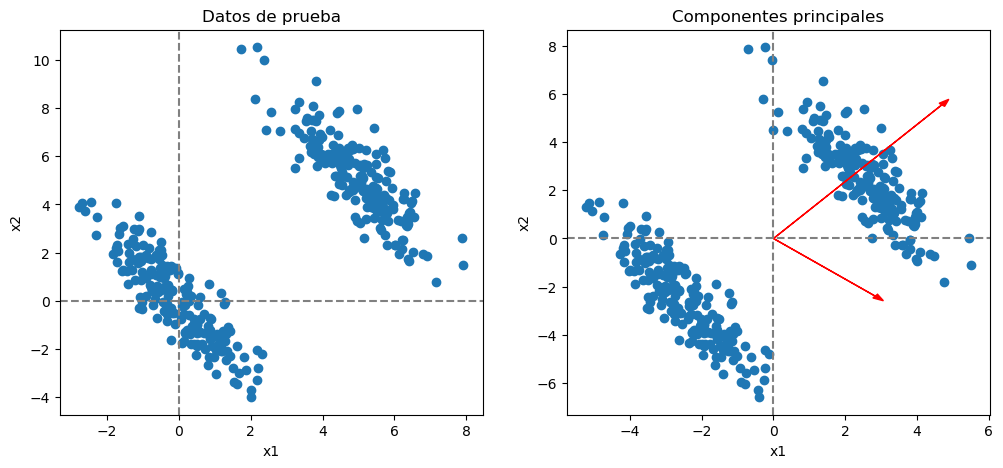

In [ ]:
np.random.seed(2025)
theta = np.pi / 3
n = 400
rotar = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
x = np.concat([np.random.randn(n//2, 2) @ np.diag([2, .5]) @ rotar,
               np.random.randn(n//2, 2) @ np.diag([2, .5]) @ rotar + np.array([5, 5])])

_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x[:,0], x[:,1])
ax[0].axhline(0, color="gray", linestyle="--")
ax[0].axvline(0, color="gray", linestyle="--")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2");
ax[0].set_title("Datos de prueba");


b = x - x.mean(axis=0)
u, s, vt = np.linalg.svd(b, full_matrices=False)
scores = u @ np.diag(s)

ax[1].scatter(b[:,0], b[:,1]);

loadings = vt.T
for col in range(loadings.shape[0]):
    ax[1].arrow(0, 0,
                loadings[col, 0] * s[col] * 0.1, loadings[col, 1] * s[col] * 0.1,
                head_width=0.2,
                color="red")
ax[1].axhline(0, color="gray", linestyle="--")
ax[1].axvline(0, color="gray", linestyle="--")
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2");
ax[1].set_title("Componentes principales");

# Mencionar varianza y otras proyecciones

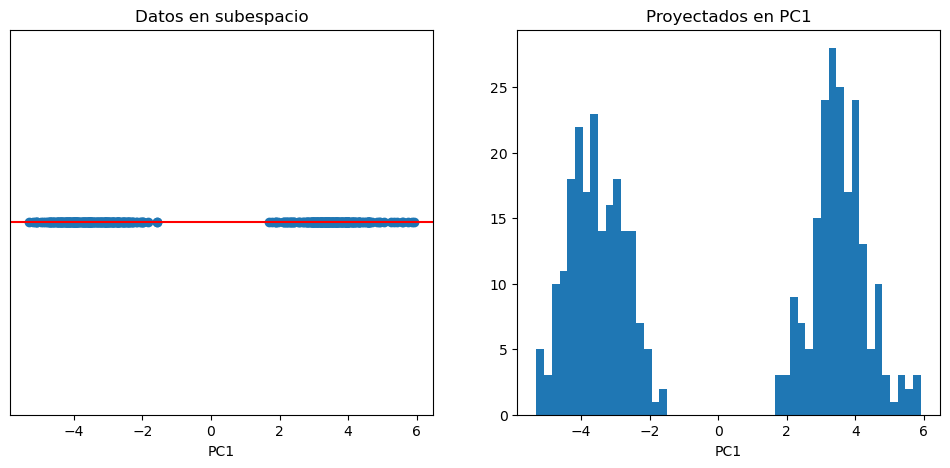

In [7]:
scores = u @ np.diag(s)
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(scores[:,0], np.zeros(scores.shape[0]));
ax[0].axhline(0, color="red")
ax[0].set_yticks([])
ax[0].set_xlabel("PC1")
ax[0].set_title("Datos en subespacio");

ax[1].hist(scores[:,0], bins=50);
ax[1].set_xlabel("PC1")
ax[1].set_title("Proyectados en PC1");


# ¿Como funciona por dentro?
Matriz de datos $B = X - \bar{X}$ de forma $B: n \times p$ <br>
Matriz de subespacios $V = [v_1 \, v_2 \, ... \, v_p]$ de forma $V: p \times p$ <br>
Los datos proyectados se les llama $Z_{score} = B \cdot V$ de forma $Z_{score}: n \times p$ <br>

Se busca hallar vectores $v_p$ que maximizen la varianza de los datos proyectados <br>
<!-- Recordar que se busca atrapar la mayor cantidad de varianza posible -->
$$
Var(Z_1) = \frac{1}{N} \sum_{n=1}^{N} \{ B_n \cdot v_1 \}^2 = v_1^T S v_1
$$ <br>

Con una restriccion: Quiero que el vector $v_1$ sea unitario
$$
v_1^T \cdot v_1 = 1
$$

Usamos multiplicadores de Lagrange

$$
\mathcal{L}(v_1, \lambda) = v_1^T S v_1 - \lambda (v_1^T \cdot v_1 - 1)
$$ <br>
Derivamos respecto a $v_1$ y hallamos los maximos
$$
\frac{\partial \mathcal{L}}{\partial v_1} = 2 S v_1 - 2\lambda v_1 = 0
$$ <br>

$$
S v_1 = \lambda v_1
$$

Autovectores!! <br>
Entonces para hallar cada subespacio se deben hallar los autovectores de $S = \frac{1}{N - 1} B^T B$ <br>
Pasado a limpio queda $S = V \; D \; V^T$

Entonces: <br>
Al calcular los autovectores se está resolviendo un problema de PCA <br>

<div class="flex-center">
    <img src="img/autovectores.png"  height=460 width=490/>
</div>

<style>
    .flex-center {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
    }
</style>

# ¿Relacion entre PCA y SVD?

Si, PCA se puede resolver a traves de SVD <br>
Solo hay que definir $B = U \; D \; V^T$ <br>

Recuerden que para resolver PCA es necesario calcular la matriz de covarianza $S = \frac{1}{N - 1} \; B^T B$ <br>
Aplicando SVD nos quedaria:
$$
S = \frac{1}{N - 1} \; (U \; D \; V^T)^T (U \; D \; V^T)
$$
$$
S = \frac{1}{N - 1} (V \; D \; U^T) (U \; D \; V^T)
$$
$$
S = \frac{1}{N - 1} \;\; (V \; D^2 \; V^T)
$$

Esto nos indica que:
* $U$: son los datos expresados en los subespacios generados por los autovectores.
* $V^T$: es la matriz de autovectores.
* $\frac{D^2}{N - 1}$: es la matriz diagonal con la varianza capturada por cada autovector.
* $U \cdot D$: es equivalente a las proyecciones de $B$ sobre los autovectores/subespacios. (tambien es lo mismo que $B \cdot V^T$). <br>

Es literalmente lo que necesita PCA para hacer su analisis

In [36]:
b[0,:] * vt[:,0]

array([-1.4217722 , -1.71214493])

In [ ]:
S = (b.T @ b) / (b.shape[0] - 1)

In [52]:
np.round(vt[:,0] @ S @ vt.T[:,0], 4), np.round(vt[:,1] @ S @ vt.T[:,1], 4)

(np.float64(13.2413), np.float64(3.4465))

In [51]:
np.round((s**2) / (b.shape[0] - 1), 4)

array([13.2413,  3.4465])

In [37]:
b.shape, vt.shape

((400, 2), (2, 2))

# Ejemplo con datos reales

In [399]:
df = pd.read_csv("data/USArrests.csv").drop(columns=["rownames"])
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [411]:
df_scaled = (df - df.mean()) / df.std()
pd.DataFrame([df_scaled.mean().round(2), df_scaled.std().round(2)], index=["mean", "std"])

,Murder,Assault,UrbanPop,Rape
mean,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0


In [412]:
u, s, vt = np.linalg.svd(df_scaled, full_matrices=False)

In [420]:
scores = u @ np.diag(s)
scores.shape

(50, 4)

In [427]:
((s**2) / (df_scaled.shape[0] - 1))

array([2.48024158, 0.98976515, 0.35656318, 0.17343009])

In [459]:
varianzas = pd.DataFrame(scores.var(axis=0, ddof=1), index=[f"PC_{i+1}" for i in range(len(s))], columns=["varianza scores"])
varianzas["varianza relativa"] = (varianzas["varianza scores"] / varianzas["varianza scores"].sum()).round(4)
varianzas["varianza scores"] = (varianzas["varianza scores"]).round(4)
varianzas

,varianza scores,varianza relativa
PC_1,2.4802,0.6201
PC_2,0.9898,0.2474
PC_3,0.3566,0.0891
PC_4,0.1734,0.0434


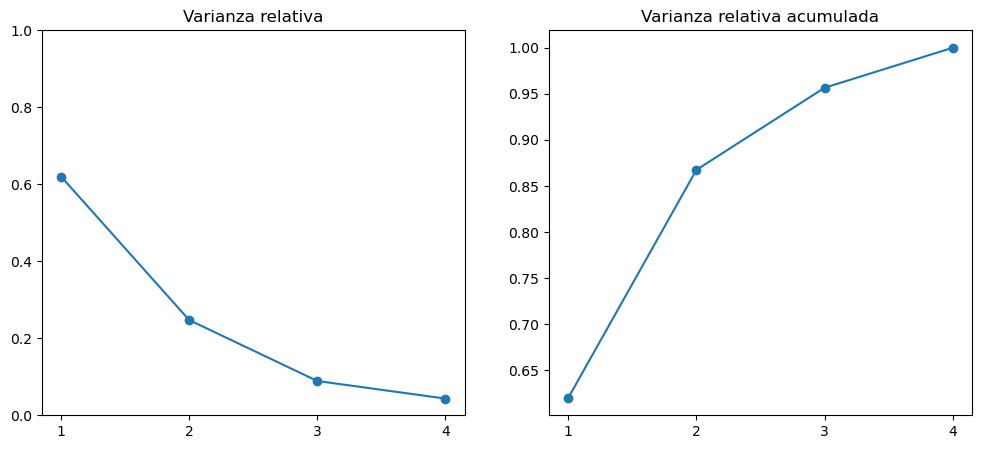

In [460]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(np.arange(4)+1, varianzas["varianza relativa"])
ax[0].scatter(np.arange(4)+1, varianzas["varianza relativa"])
ax[0].set_ylim((0, 1))
ax[0].set_xticks(np.arange(4)+1)
ax[0].set_title("Varianza relativa")

ax[1].plot(np.arange(4)+1, np.cumsum(varianzas["varianza relativa"]));
ax[1].scatter(np.arange(4)+1, np.cumsum(varianzas["varianza relativa"]));
ax[1].set_xticks(np.arange(4)+1)
ax[1].set_title("Varianza relativa acumulada");

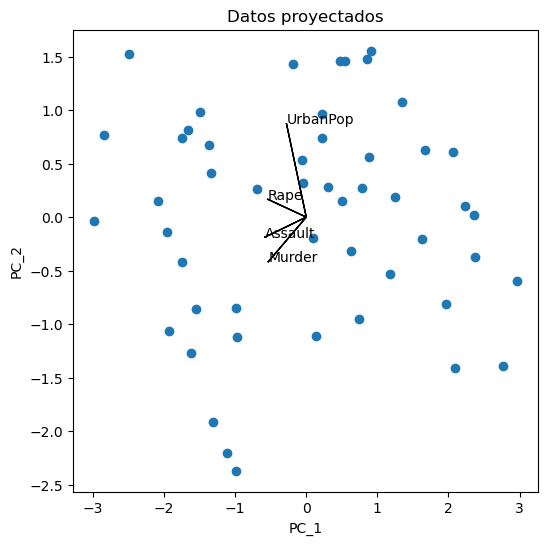

In [461]:
_, ax = plt.subplots(figsize=(6,6))

pc1, pc2 = 0, 1
ax.scatter(scores[:,pc1], scores[:,pc2]);

loadings = vt.T
for col in range(loadings.shape[1]):
    ax.arrow(0, 0, loadings[col, pc1], loadings[col, pc2])
    
    ax.text(loadings[col,pc1],
            loadings[col,pc2],
            df.columns[col])

ax.set_xlabel(f"PC_{pc1+1}")
ax.set_ylabel(f"PC_{pc2+1}")
ax.set_title("Datos proyectados");

# Conclusiones

PCA se usa para llevar datos con muchas variables a un espacio que aun capture la mayoria de informacion, pero se pueda graficar con mayor simpleza. <br>

Aplicaciones comunes:
* Reduccion de dimensionalidad.
* Compresion de datos. 
* Extraccion de features.
* Visualizaciones.
* Completar matrices.